Nabila Adawy 


n.roshdy@innopolis.university


B19-RO-01 

Digital Signal Processing


Home Assignment 1

# Task 1

In [512]:
from numpy.fft import fft, ifft, fft2, ifft2,fftfreq, fftshift, ifftshift
from numpy import linspace, sin, pi, conjugate
import matplotlib.image as mpimg
from matplotlib.pyplot import *
import numpy as np
import math 

Noisy and Clean Signal Visualization

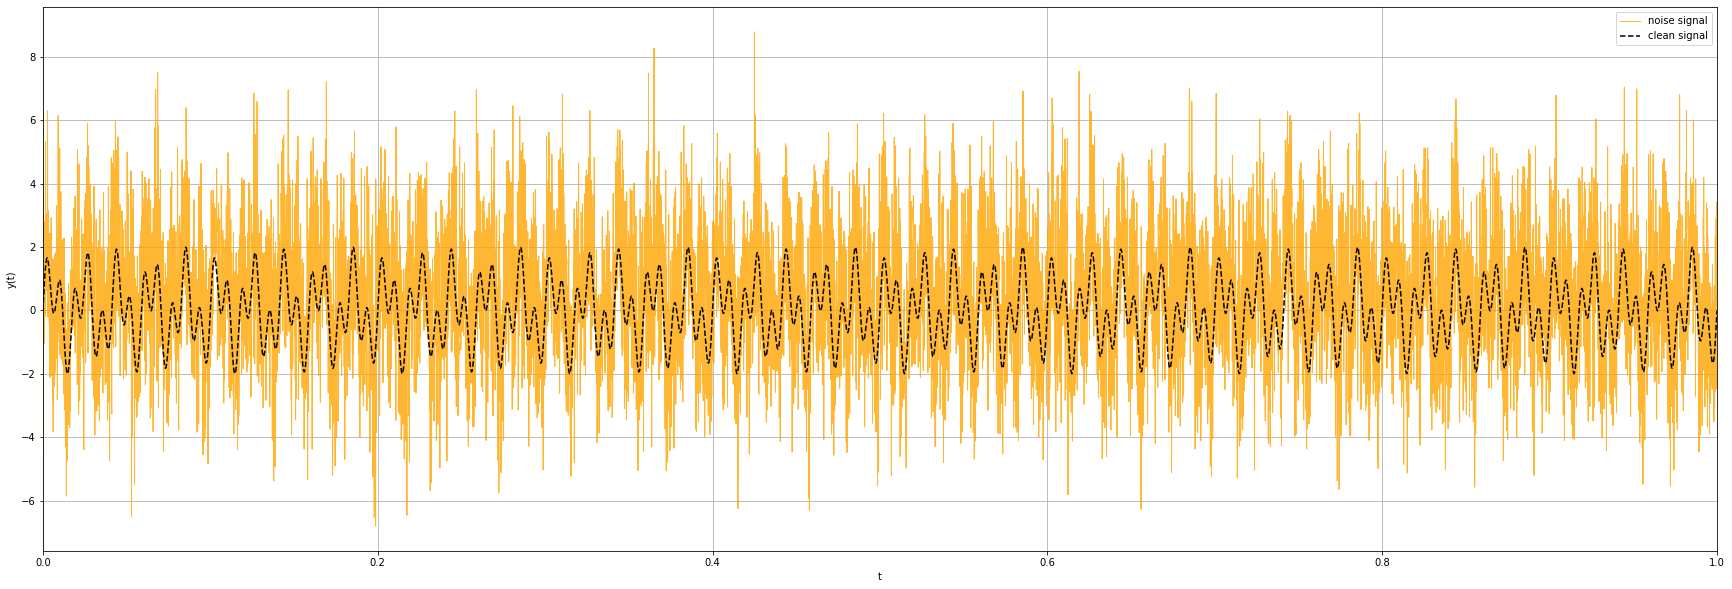

In [513]:
y, y_e = [], []
n = 10000
T = linspace(0, 1, n)
for t in T:
  y_i = sin(2*pi*50*t) + sin(2*pi*120*t)
  y.append(y_i)

noise = np.random.normal(0.5,1.8,10000)
y_e = y + noise

figure(figsize=(30,10))
plot(T, y_e, lw=1, color='orange', label="noise signal", alpha = 0.8)
plot(T, y, color='k', linestyle='--', label="clean signal")
legend()
xlim([0,1])
xlabel("t")
ylabel("y(t)")
grid(True)
show()


Fast Fourier Transform of the discretized function yϵ(t) and PDS Visualization

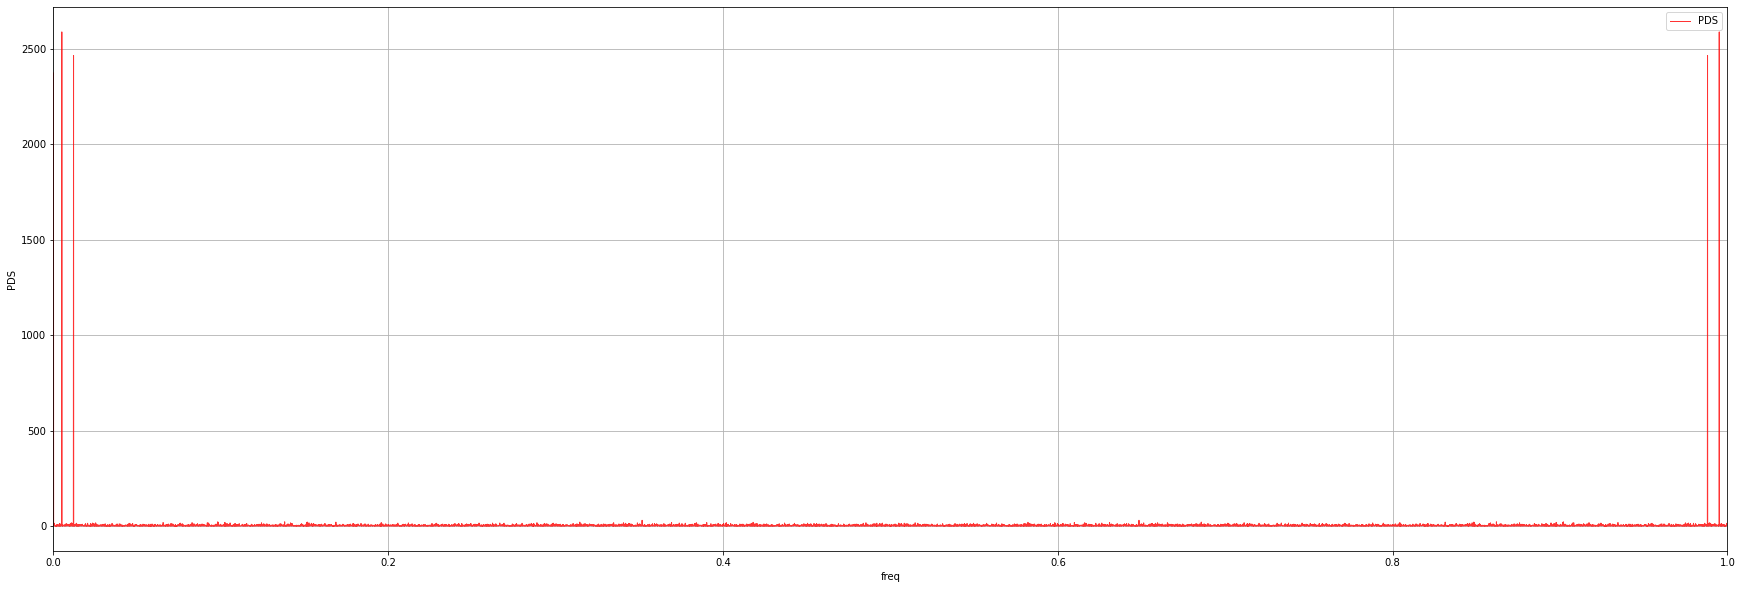

In [514]:
y_fft = fft(y_e)
conj = conjugate(y_fft)
PDS = (y_fft * conj)/n
figure(figsize=(30,10))
plot(T, PDS.real, lw=1, color='red', label="PDS", alpha = 0.8)
legend()
xlim([0,1])
# ylim([0,35])
xlabel("freq")
ylabel("PDS")
grid(True)
show()

Filtering the PDS from noise and visualizing it with the original PDS 

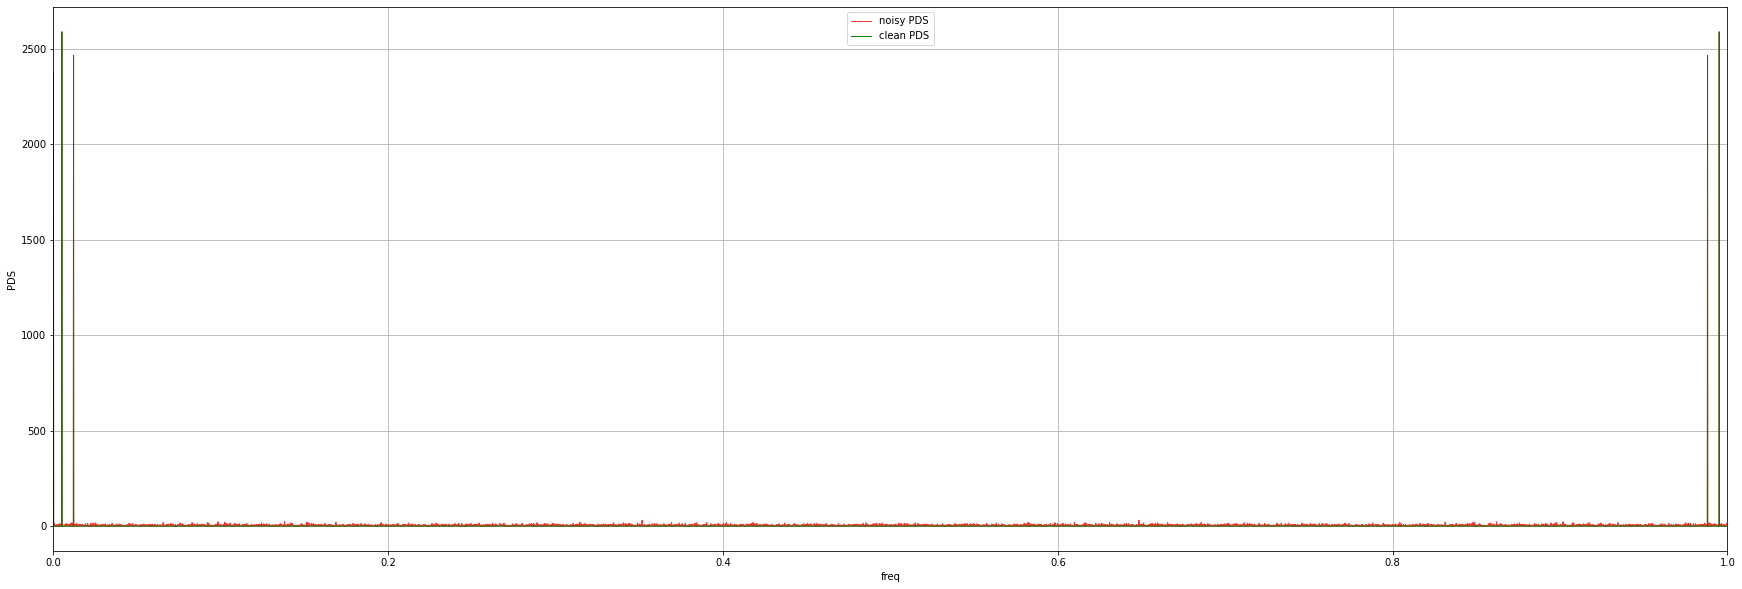

In [515]:
tau = 100
PDS_clean, index = [],[]
for i in range(len(PDS)):
  if PDS[i] > tau: 
    PDS_clean.append(PDS[i])
    index.append(i)
  else: PDS_clean.append(0)

PDS_clean = np.array(PDS_clean)

figure(figsize=(30,10))
plot(T, PDS.real, lw=1, color='red', label="noisy PDS", alpha=0.8)
plot(T, PDS_clean.real, lw=1, color='green', label="clean PDS")
legend()
xlim([0,1])
# ylim([0,40])
xlabel("freq")
ylabel("PDS")
grid(True)
show()

Closer view of the Noisy and Filtered PDS Signal

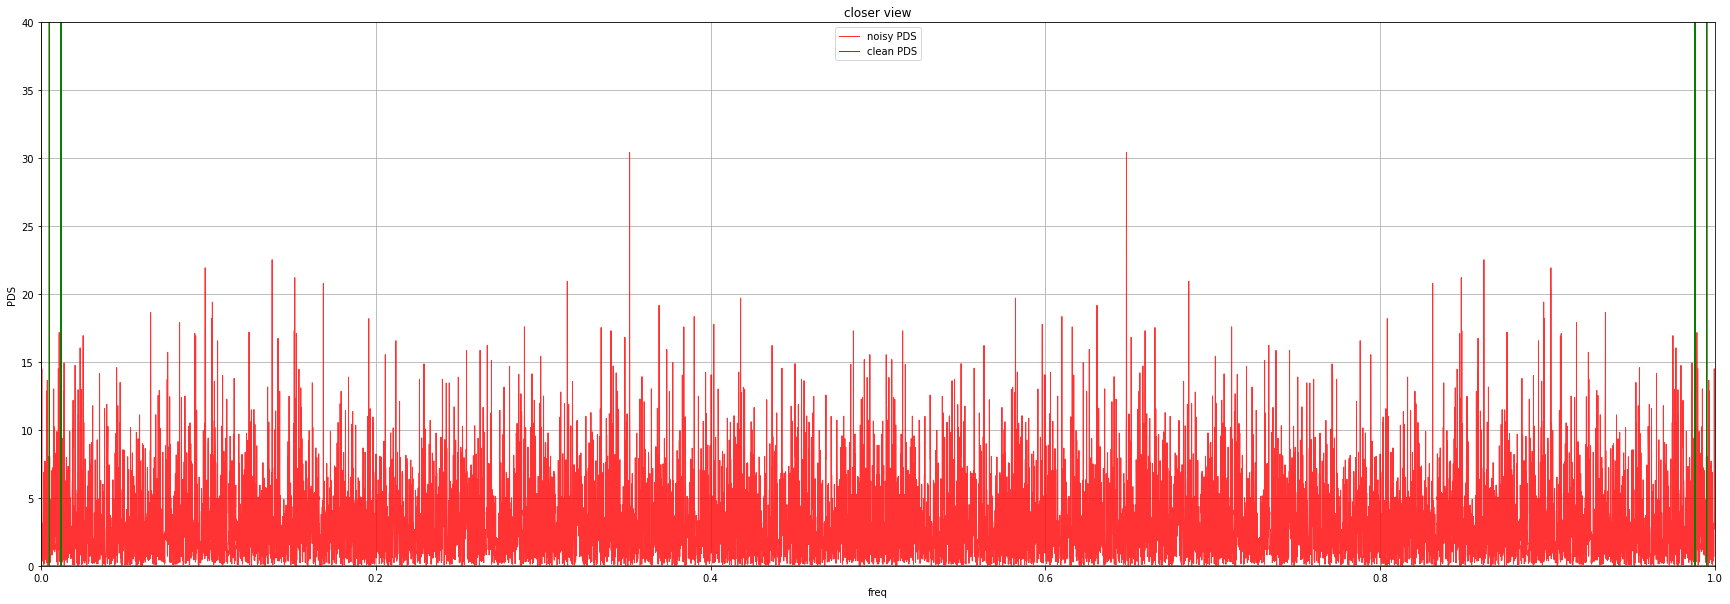

In [516]:
PDS_clean = np.array(PDS_clean)

figure(figsize=(30,10))
title("closer view")
plot(T, PDS.real, lw=1, color='red', label="noisy PDS", alpha=0.8)
plot(T, PDS_clean.real, lw=1, color='green', label="clean PDS")
legend()
xlim([0,1])
ylim([0,40])
xlabel("freq")
ylabel("PDS")
grid(True)
show()

Filtering the discretized function yϵ(ω) and comput Inverse Fast Fourier Transform to reconstruct the original function.

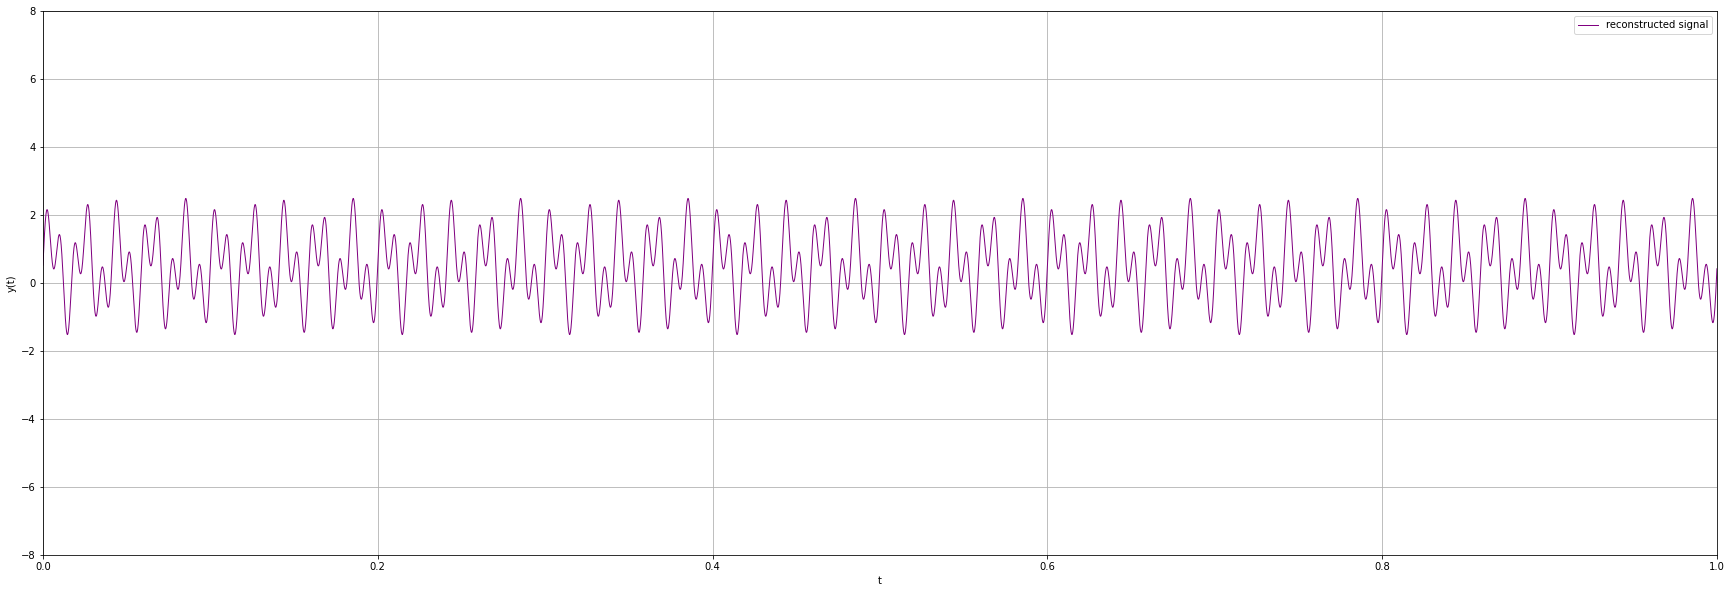

In [517]:
for i in range(len(y_fft)):
  if i not in index:
    y_fft[i] = 0

inv = ifft(y_fft)

figure(figsize=(30,10))
plot(T, inv.real, lw=1, color='purple', label="reconstructed signal")
legend()
xlim([0,1])
ylim([-8,8])
xlabel("t")
ylabel("y(t)")
grid(True)
show()

# Task 2

Importing the Image and Display it

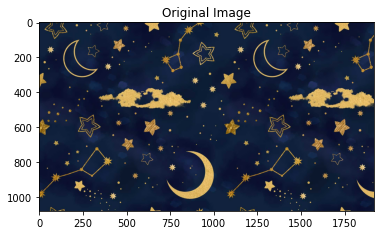

(1080, 1920, 3)


In [518]:
pic = mpimg.imread('stars.jpg')
title("Original Image")
imshow(pic)
show()
print(pic.shape)

Converting the Image into Gray Scale Format

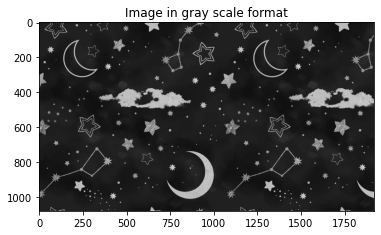

In [519]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray_pic = gray(pic)
title("Image in gray scale format")
imshow(gray_pic,cmap = get_cmap(name = 'gray'))
show()

Computing Fast Fourier Transform of the image and showing the obtained spectrum (after shifting the zero-frequency)

Computing the absolute of the spectrum, adding 1 and taking the natural logarithm.

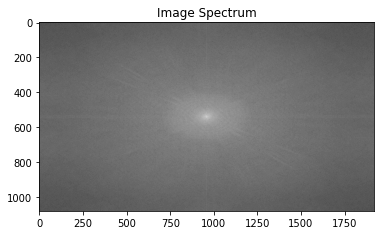

In [520]:
f2_A = fftshift(fft2(gray_pic))
spec = np.log(np.abs(f2_A)+1)
title("Image Spectrum")
imshow(spec, cmap = get_cmap(name = 'gray'))
show()

Reducing the dimensionality of the image from 2D array into 1D array. Then taking the absolute and Sorting it.

In [521]:
w = f2_A.shape[0]
h = f2_A.shape[1]

f_resh = np.reshape(f2_A, w*h)
A_f = np.abs(f_resh)
a = np.sort(A_f)

Setting a Value for τ, and Defining the threshold.

In [522]:
tau = 0.1
b = math.floor((1-tau)*w*h)
threshold = a[b]

Filtering the spectrum by keeping the elements that are bigger than the threshold

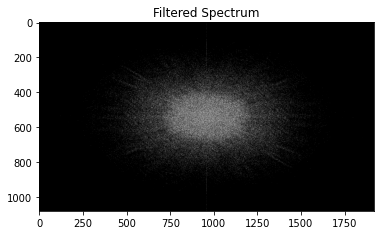

In [523]:
indices = []
A_f_spec = []
for i in range(len(A_f)):
  if A_f[i] > threshold:
    A_f_spec.append(A_f[i])
    indices.append(i)
  else:
    A_f_spec.append(0)

A_f_2d = np.array(np.reshape(A_f_spec, (w,h)), dtype='uint8')
title("Filtered Spectrum")
imshow(A_f_2d, cmap = get_cmap(name = 'gray'))
show()

Filtering the 2D image using the indices from the previous step

In [524]:
for i in range(w):
  for j in range(h):
    if A_f_spec[i*h+j] > 0:
        f2_A[i,j] = f2_A[i,j]
    else:
        f2_A[i,j] = 0

Computing Inverse Fourier Transform and Inverse Shifting to obtain the reconstructed image

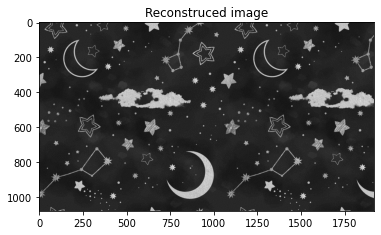

In [525]:
recon = ifft2(ifftshift(f2_A))
title("Reconstruced image")
imshow(recon.real, cmap = get_cmap(name = 'gray'))
show()